Análisis exploratorio de datos (EDA)

In [1]:
import pandas as pd

# Cargamos el conjunto de datos de entrenamiento
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

# Visualizamos las primeras filas del conjunto de datos
train_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


1. Seleccionamos las 31 características más correlacionadas con el target para cumplir con lo propuesto en el enunciadoy seleccionar aquellas con más poder predictivo.

In [2]:
# Calculamos la correlación sólo para las características numéricas
numeric_data = train_data.select_dtypes(include=[float, int])
correlations = numeric_data.corr()['SalePrice'].sort_values(ascending=False)

# Mostramos las 31 características más correlacionadas (incluyendo SalePrice)
top_correlations = correlations.head(31)
top_correlations

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
ScreenPorch     0.111447
PoolArea        0.092404
MoSold          0.046432
3SsnPorch       0.044584
BsmtFinSF2     -0.011378
BsmtHalfBath   -0.016844
MiscVal        -0.021190
Name: SalePrice, dtype: float64

1.1 Podemos visualizarlo en un gráfico de heatmap de correlaciones

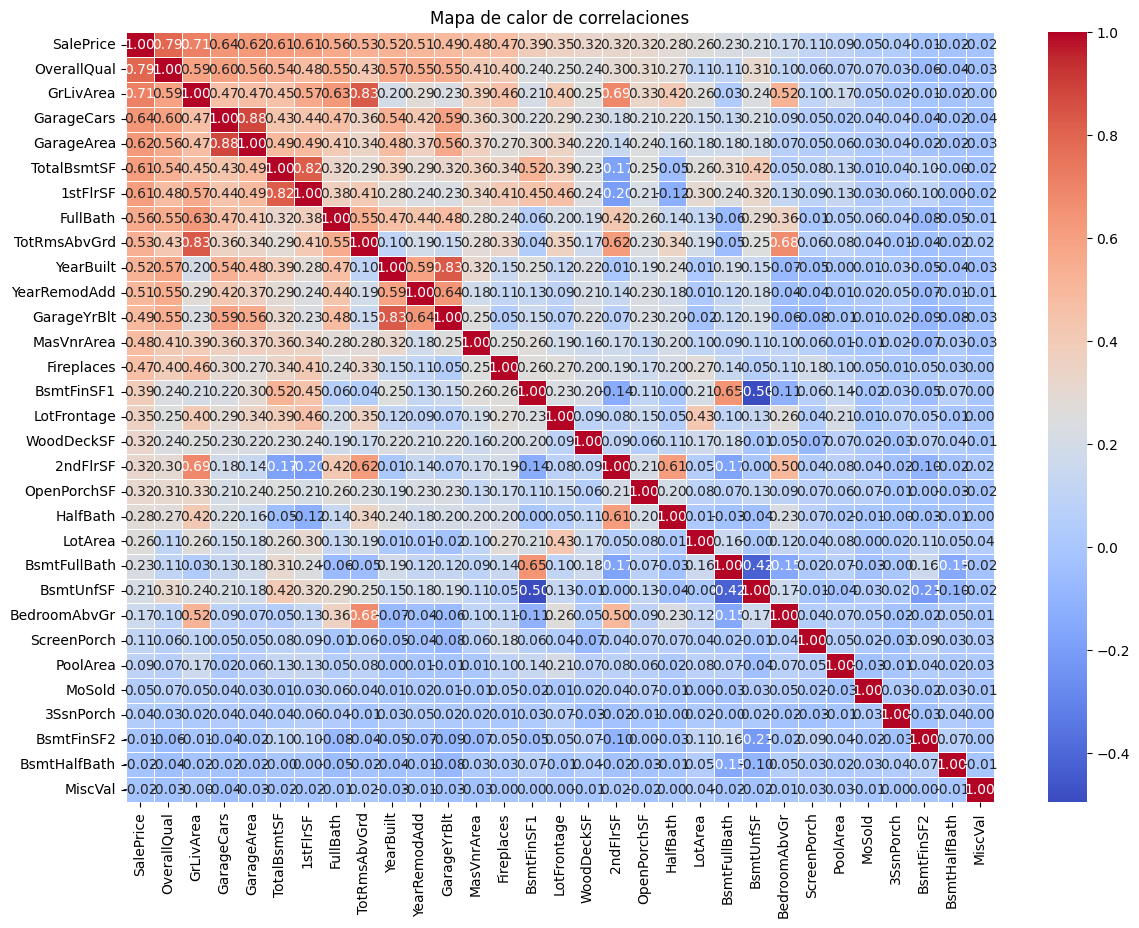

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos las 31 características más correlacionadas
selected_features = top_correlations.index

# Creamos una matriz de correlación para estas características
corr_matrix = train_data[selected_features].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor="white")
plt.title('Mapa de calor de correlaciones')
plt.show()


1.2 Gestión de NAN

In [4]:
# Seleccionamos las 30 características más correlacionadas (sin incluir SalePrice)
selected_features = selected_features.drop("SalePrice")

# Subset del conjunto de datos con las características seleccionadas
subset_data = train_data[selected_features]

# Identificamos las características con valores faltantes
missing_data = subset_data.isnull().sum()
features_with_missing = missing_data[missing_data > 0]

features_with_missing


GarageYrBlt     81
MasVnrArea       8
LotFrontage    259
dtype: int64

    GarageYrBlt (Año de construcción del garaje): Si falta este valor, es probable que la vivienda no tenga garaje. Podemos imputar estos valores faltantes con 0, indicando la ausencia de un garaje.
    MasVnrArea (Área de revestimiento de mampostería): Si este valor falta, puede indicar que la vivienda no tiene revestimiento de mampostería. Al igual que con "GarageYrBlt", podemos imputar estos valores con 0.
    LotFrontage (Frente del lote): Este es un caso más complicado ya que falta en una cantidad significativa de entradas. Una estrategia podría ser imputar con la mediana.

In [5]:
# Imputación de valores faltantes
subset_data['GarageYrBlt'].fillna(0, inplace=True)
subset_data['MasVnrArea'].fillna(0, inplace=True)
subset_data['LotFrontage'].fillna(subset_data['LotFrontage'].median(), inplace=True)

# Verificamos que ya no haya valores faltantes
missing_after_imputation = subset_data.isnull().sum().sum()
missing_after_imputation


/tmp/ipykernel_21/2610548886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['GarageYrBlt'].fillna(0, inplace=True)
/tmp/ipykernel_21/2610548886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['MasVnrArea'].fillna(0, inplace=True)
/tmp/ipykernel_21/2610548886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['LotFrontage'].fillna(subset_data['LotFrontage'].median(), inplace=True)


0

In [6]:
# Verificamos si hay características categóricas en el subset
categorical_features = subset_data.select_dtypes(include=['object']).columns

categorical_features

Index([], dtype='object')

1.4 Preprocesar los datos

In [7]:
from sklearn.preprocessing import StandardScaler

# Escalamos las características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(subset_data)

# Convertimos nuevamente a DataFrame para facilitar su manipulación
scaled_features_df = pd.DataFrame(scaled_features, columns=subset_data.columns)

scaled_features_df.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,ScreenPorch,PoolArea,MoSold,3SsnPorch,BsmtFinSF2,BsmtHalfBath,MiscVal
0,0.651479,0.370333,0.311725,0.351000,-0.459303,-0.793434,0.789741,0.912210,1.050994,0.878668,...,1.107810,-0.944591,0.163779,-0.270208,-0.068692,-1.599111,-0.116339,-0.288653,-0.241061,-0.087688
1,-0.071836,-0.482512,0.311725,-0.060731,0.466465,0.257140,0.789741,-0.318683,0.156734,-0.429577,...,-0.819964,-0.641228,0.163779,-0.270208,-0.068692,-0.489110,-0.116339,-0.288653,3.948809,-0.087688
2,0.651479,0.515013,0.311725,0.631726,-0.313369,-0.627826,0.789741,-0.318683,0.984752,0.830215,...,1.107810,-0.301643,0.163779,-0.270208,-0.068692,0.990891,-0.116339,-0.288653,-0.241061,-0.087688
3,0.651479,0.383659,1.650307,0.790804,-0.687324,-0.521734,-1.026041,0.296763,-1.863632,-0.720298,...,1.107810,-0.061670,0.163779,-0.270208,-0.068692,-1.599111,-0.116339,-0.288653,-0.241061,-0.087688
4,1.374795,1.299326,1.650307,1.698485,0.199680,-0.045611,0.789741,1.527656,0.951632,0.733308,...,1.107810,-0.174865,1.390023,-0.270208,-0.068692,2.100892,-0.116339,-0.288653,-0.241061,-0.087688


2. MODELO con tensorflow

2.1 Definir el modelo


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Definición de la arquitectura del modelo
model = Sequential()

# Capa de entrada
model.add(Dense(64, activation='relu', input_dim=scaled_features_df.shape[1]))
model.add(Dropout(0.2))

# Capas ocultas
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Capa de salida
model.add(Dense(1, activation='linear'))

# Compilación del modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Resumen del modelo
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6

2.2 Entrenar el modelo

In [9]:
from sklearn.model_selection import train_test_split

X = scaled_features_df
y = train_data['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1)


Epoch 1/100
37/37 [==============================] - 1s 10ms/step - loss: 38884298752.0000 - val_loss: 39649411072.0000
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 38862774272.0000 - val_loss: 39587831808.0000
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 38671388672.0000 - val_loss: 39179259904.0000
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 37794529280.0000 - val_loss: 37646397440.0000
Epoch 5/100
37/37 [==============================] - 0s 4ms/step - loss: 35279130624.0000 - val_loss: 33864132608.0000
Epoch 6/100
37/37 [==============================] - 0s 4ms/step - loss: 30181797888.0000 - val_loss: 26839943168.0000
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 22086897664.0000 - val_loss: 17611446272.0000
Epoch 8/100
37/37 [==============================] - 0s 4ms/step - loss: 14095933440.0000 - val_loss: 9859490816.0000
Epoch 9/100
37/37 [=============================

2.3 Evaluar el modelo

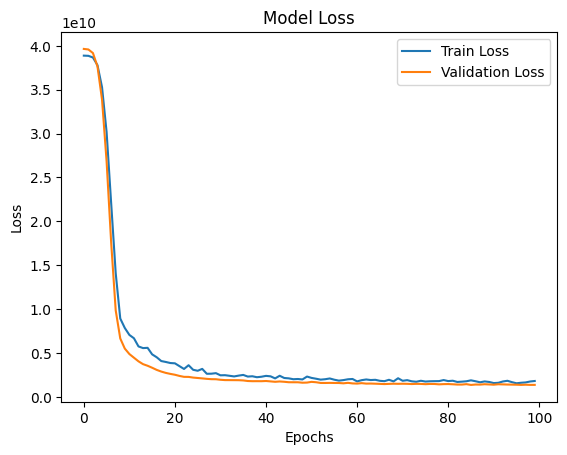

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show()


2.4 Mejorar el modelo

1. Preparación de datos (asumiendo que ya has procesado y escalado los datos):

In [11]:
from sklearn.model_selection import train_test_split

X = scaled_features_df
y = train_data['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


2. Nueva arquitectura:

Vamos a probar una arquitectura más profunda con más capas:

In [12]:
new_model = Sequential()

# Capa de entrada
new_model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
new_model.add(Dropout(0.3))

# Capas ocultas
new_model.add(Dense(256, activation='relu'))
new_model.add(Dropout(0.3))
new_model.add(Dense(128, activation='relu'))
new_model.add(Dropout(0.3))
new_model.add(Dense(64, activation='relu'))
new_model.add(Dropout(0.3))

# Capa de salida
new_model.add(Dense(1, activation='linear'))

# Compilación
new_model.compile(optimizer='adam', loss='mean_squared_error')


3. EarlyStopping y ModelCheckpoint:

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping detendrá el entrenamiento si el 'val_loss' no mejora después de 20 épocas
early_stop = EarlyStopping(monitor='val_loss', patience=20)

# ModelCheckpoint guardará el modelo con el mejor 'val_loss'
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

callbacks = [early_stop, model_checkpoint]


4. Entrenamiento:

In [14]:
history = new_model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                        epochs=200, batch_size=32, verbose=1, callbacks=callbacks)


Epoch 1/200
37/37 [==============================] - 1s 10ms/step - loss: 38869164032.0000 - val_loss: 39561838592.0000
Epoch 2/200
37/37 [==============================] - 0s 5ms/step - loss: 37875712000.0000 - val_loss: 35822714880.0000
Epoch 3/200
37/37 [==============================] - 0s 5ms/step - loss: 24417642496.0000 - val_loss: 8745035776.0000
Epoch 4/200
37/37 [==============================] - 0s 5ms/step - loss: 6893125632.0000 - val_loss: 3233925120.0000
Epoch 5/200
37/37 [==============================] - 0s 5ms/step - loss: 4697943040.0000 - val_loss: 2528677120.0000
Epoch 6/200
37/37 [==============================] - 0s 5ms/step - loss: 3677487616.0000 - val_loss: 2074675840.0000
Epoch 7/200
37/37 [==============================] - 0s 5ms/step - loss: 3628321024.0000 - val_loss: 1837730816.0000
Epoch 8/200
37/37 [==============================] - 0s 5ms/step - loss: 3298936576.0000 - val_loss: 1806615936.0000
Epoch 9/200
37/37 [==============================] - 0s 5m

5. Evaluación:

In [15]:
from tensorflow.keras.models import load_model

best_model = load_model('best_model.h5')
val_loss = best_model.evaluate(X_val, y_val, verbose=0)
print(f"Validation MSE for the best model: {val_loss}")


Validation MSE for the best model: 1179189760.0


2.5 Otra arquitectura más:

In [16]:
alternative_model = Sequential()

# Capa de entrada
alternative_model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
alternative_model.add(Dropout(0.4))

# Capas ocultas
alternative_model.add(Dense(512, activation='relu'))
alternative_model.add(Dropout(0.4))

# Capa de salida
alternative_model.add(Dense(1, activation='linear'))

# Compilación
alternative_model.compile(optimizer='adam', loss='mean_squared_error')


In [17]:
# EarlyStopping detendrá el entrenamiento si el 'val_loss' no mejora después de 20 épocas
early_stop_alt = EarlyStopping(monitor='val_loss', patience=20)

# ModelCheckpoint guardará el modelo con el mejor 'val_loss'
model_checkpoint_alt = ModelCheckpoint('best_model_alternative.h5', monitor='val_loss', save_best_only=True)

callbacks_alt = [early_stop_alt, model_checkpoint_alt]


In [18]:
history_alt = alternative_model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                                    epochs=200, batch_size=32, verbose=1, callbacks=callbacks_alt)


Epoch 1/200
37/37 [==============================] - 1s 10ms/step - loss: 38878466048.0000 - val_loss: 39630761984.0000
Epoch 2/200
37/37 [==============================] - 0s 7ms/step - loss: 38812651520.0000 - val_loss: 39488835584.0000
Epoch 3/200
37/37 [==============================] - 0s 7ms/step - loss: 38523351040.0000 - val_loss: 39006617600.0000
Epoch 4/200
37/37 [==============================] - 0s 7ms/step - loss: 37734158336.0000 - val_loss: 37864820736.0000
Epoch 5/200
37/37 [==============================] - 0s 6ms/step - loss: 36196945920.0000 - val_loss: 35787821056.0000
Epoch 6/200
37/37 [==============================] - 0s 7ms/step - loss: 33616050176.0000 - val_loss: 32599904256.0000
Epoch 7/200
37/37 [==============================] - 0s 6ms/step - loss: 29948389376.0000 - val_loss: 28374427648.0000
Epoch 8/200
37/37 [==============================] - 0s 6ms/step - loss: 25468176384.0000 - val_loss: 23474831360.0000
Epoch 9/200
37/37 [============================

In [19]:
best_model_alt = load_model('best_model_alternative.h5')
val_loss_alt = best_model_alt.evaluate(X_val, y_val, verbose=0)
print(f"Validation MSE for the alternative model: {val_loss_alt}")


Validation MSE for the alternative model: 1262679808.0


3. Guardar resultados

3.1 Preprocesar igual que en el modelo con los datos de entrenamiento.

In [20]:
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_subset = test_data[selected_features]

# Imputar valores faltantes
test_subset['GarageYrBlt'].fillna(0, inplace=True)
test_subset['MasVnrArea'].fillna(0, inplace=True)
test_subset['LotFrontage'].fillna(test_subset['LotFrontage'].median(), inplace=True)

# Escalar características
test_scaled = scaler.transform(test_subset)


/tmp/ipykernel_21/2443949799.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_subset['GarageYrBlt'].fillna(0, inplace=True)
/tmp/ipykernel_21/2443949799.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_subset['MasVnrArea'].fillna(0, inplace=True)
/tmp/ipykernel_21/2443949799.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_subset['LotFrontage'].fillna(test_subset['LotFrontage'].median(), inplace=True)


In [21]:
predictions = best_model.predict(test_scaled)

46/46 [==============================] - 0s 1ms/step


In [22]:
sample_submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample_submission['SalePrice'] = predictions
sample_submission.to_csv('my_submission.csv', index=False)

In [23]:
sample_submission

,Id,SalePrice
0,1461,93066.648438
1,1462,178103.656250
2,1463,176021.640625
3,1464,198031.015625
4,1465,193446.140625
...,...,...
1454,2915,77722.726562
1455,2916,107122.757812
1456,2917,203425.593750
1457,2918,95291.343750
